# Lista 4 FRACTAIS

In [1]:
import os
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.ndimage import binary_dilation
import sys

plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    "text.usetex": True,
    "grid.alpha": .5,
})
plt.style.use('ggplot')

def ax(x,a,b):
    return a*x+b

def chi2(ajuste, hist, err, ddof):
    soma=0
    for x,y,z in zip(ajuste,hist,err):
        soma+=(x-y)**2/z**2
    return soma/ddof

## Questão 1: Triangulo de Sierpinski

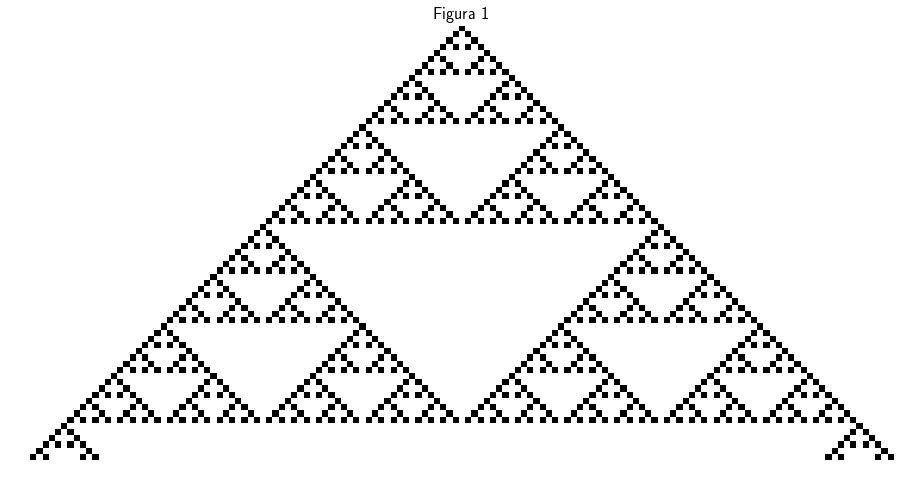

In [85]:
rede=np.zeros((70,141))
rede[69,70]=1

def autind(trem):
    if trem == [1,1,1] or trem ==[1,0,1] or trem==[0,1,0] or trem==[0,0,0]: ind=0
    if trem == [1,1,0] or trem==[1,0,0] or trem==[0,1,1] or trem==[0,0,1]: ind=1
    return ind

def maq(j,i):
    if i==0: trem=[0,rede[j,i],rede[j,i+1]]
    if i==rede.shape[1]-1: trem=[rede[j,i-1],rede[j,i],0]   
    else: trem=[rede[j,i-1],rede[j,i],rede[j,i+1]]
    return trem

for j in np.arange(rede.shape[0]-1,0,-1):
    for i in range(1,rede.shape[1]-1):
        trem=maq(j,i)
        rede[j-1,i]=autind(trem)
        
            

fig=plt.figure(figsize=(16,8))
plt.title("Figura 1",fontsize='xx-large')
plt.imshow(rede,cmap="Greys")
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(False)
fig.savefig('grafico1.png', bbox_inches='tight', dpi=100)
plt.show()

#### grandao

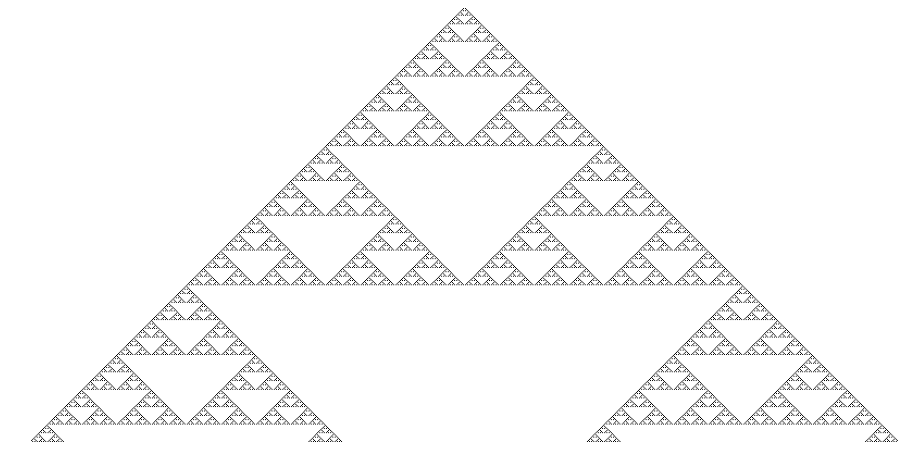

In [84]:
rede=np.zeros((400,801))
rede[399,400]=1

def autind(trem):
    if trem == [1,1,1] or trem ==[1,0,1] or trem==[0,1,0] or trem==[0,0,0]: ind=0
    if trem == [1,1,0] or trem==[1,0,0] or trem==[0,1,1] or trem==[0,0,1]: ind=1
    return ind

def maq(j,i):
    if i==0: trem=[0,rede[j,i],rede[j,i+1]]
    if i==rede.shape[1]-1: trem=[rede[j,i-1],rede[j,i],0]   
    else: trem=[rede[j,i-1],rede[j,i],rede[j,i+1]]
    return trem

for j in np.arange(rede.shape[0]-1,0,-1):
    for i in range(2,rede.shape[1]-2):
        trem=maq(j,i)
        rede[j-1,i]=autind(trem)
        
            

plt.figure(figsize=(16,8))
plt.imshow(rede,cmap="Greys")
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(False)
plt.show()

## Questão 2: Dimensão fractal - Caixas

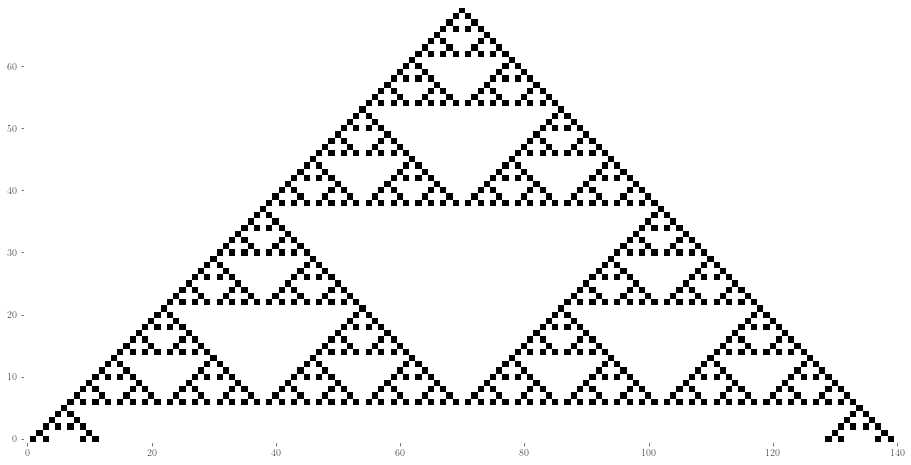

In [190]:
plt.figure(figsize=(16,8))
plt.imshow(rede,cmap="Greys")
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
plt.grid(False)
plt.show()

In [268]:
countlist=[]
Llist=np.array([70,30,25,20,15,10,5,2])
for L in [70,30,25,20,15,10,5,2]:
    count=0
    #print(rede.shape)
    for i in range(0,rede.shape[0],L):
        for j in range(0,rede.shape[1],L):
            if j+L>rede.shape[1] or i+L>rede.shape[0]:continue
            #print((i,i+L),(j,j+L), 1 in rede[i:i+L,j:j+L])
            if 1 in rede[i:i+L,j:j+L]: count+=1
    print(count)
    countlist.append(count)

2
7
9
15
27
54
151
506


In [220]:
def ax(x,a,b):
    return a*x+b

1.6014654275979934
0.04778566278158346
-0.2399344684283014


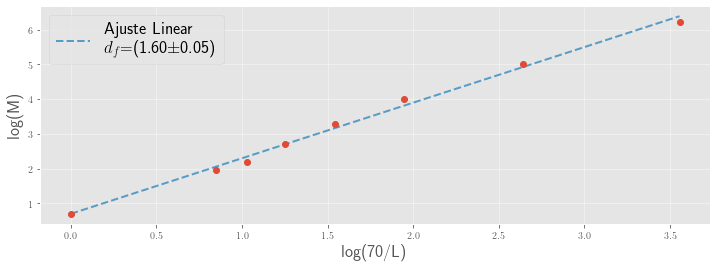

In [271]:
fig=plt.figure(figsize=(12,4))
x=np.log(70/Llist)
y=np.log(np.array(countlist))
plt.plot(x,y,'o',zorder=2)
popt0,pcov0=curve_fit(ax,x,y)
print(popt0[0])
[sa,sb]=np.sqrt(np.diag(pcov0))
print(sa)
plt.plot(x,ax(x,*popt0),linewidth=2,linestyle='dashed',alpha=.8,zorder=1,
         label='Ajuste Linear\n'+r'$d_f$=({:.2f}'.format(popt0[0])+r'$\pm${:.2f})'.format(sa))

print((1.59-popt0[0])/sa)

plt.xlabel("log(70/L)",fontsize='xx-large')
plt.ylabel("log(M)",fontsize='xx-large')
plt.legend(fontsize='xx-large',loc='upper left')
fig.savefig('grafico2.png', bbox_inches='tight', dpi=100)
plt.show()

54
151
506


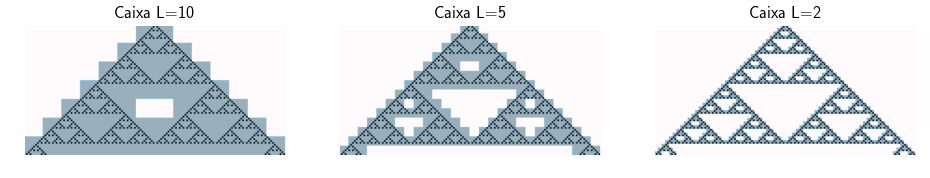

In [300]:
countlist=[]
Llist=np.array([10,5,2])
fig=plt.figure(figsize=(16,8))
sub=1
for L in Llist:
    count=0
    mask=np.zeros(rede.shape)
    for i in range(0,rede.shape[0],L):
        for j in range(0,rede.shape[1],L):
            if j+L>rede.shape[1] or i+L>rede.shape[0]:continue
            #print((i,i+L),(j,j+L), 1 in rede[i:i+L,j:j+L])
            if 1 in rede[i:i+L,j:j+L]: 
                count+=1
                mask[i:i+L,j:j+L]=1
    print(count)
    countlist.append(count)
    plt.subplot(1,3,sub)
    plt.title("Caixa L="+str(L),fontsize='xx-large')
    plt.imshow(rede,cmap="Greys")
    plt.imshow(mask,cmap="PuBu",alpha=.4)
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.grid(False)
    #file='grafico2-'+str(L)+'.png'
    
    sub+=1
fig.savefig('tudojunto2.png', bbox_inches='tight', dpi=100)
plt.show()

## Questão 3

### CLUSTER

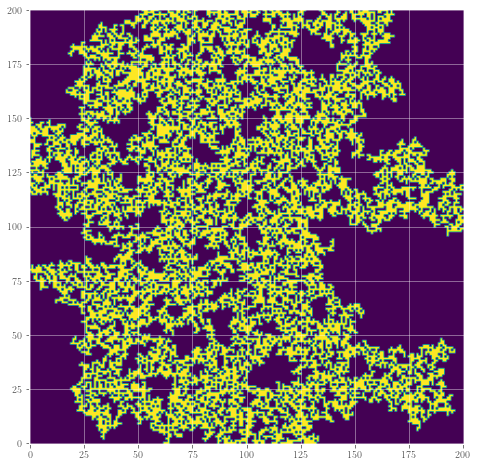

25869

In [459]:
matrix=np.zeros((201,201))
matrix[100,100]=1

perimeter=np.zeros(matrix.shape)
perimeter=binary_dilation(matrix==1).astype(matrix.dtype)-matrix
exclud=np.zeros(matrix.shape)
while(np.count_nonzero(matrix+exclud)!=0):
    
    prob=np.random.random(np.count_nonzero(perimeter))
    
    for x,y,p in zip(np.where(perimeter==1)[0],np.where(perimeter==1)[1],prob):
        if p>0.5927:exclud[x,y]=1
        else:matrix[x,y]=1
    perimeter=binary_dilation(matrix==1).astype(matrix.dtype)-matrix-exclud
    if np.count_nonzero(perimeter)==0: break
plt.figure(figsize=(8,8))
plt.imshow(matrix)
plt.show()
np.count_nonzero(matrix+exclud)

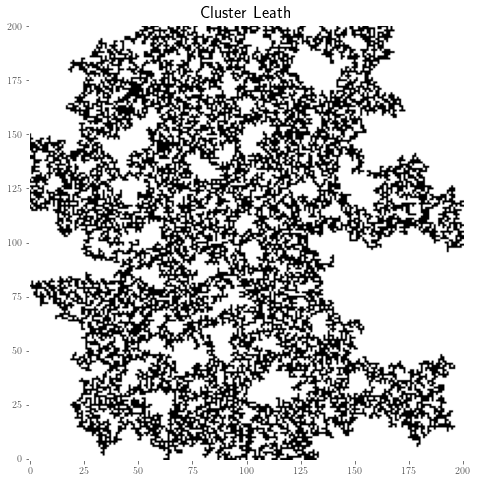

In [476]:
fig=plt.figure(figsize=(8,8))
plt.title("Cluster Leath",fontsize='xx-large')
plt.imshow(matrix,cmap="Greys")
plt.grid(False)
fig.savefig('grafico3a.png', bbox_inches='tight', dpi=100)
plt.show()

In [478]:
countlist=[]
Llist=np.array([200,100,50,25,20,15,10,5,2])
for L in Llist:
    count=0
    
    #print(rede.shape)
    for i in range(0,matrix.shape[0],L):
        for j in range(0,matrix.shape[1],L):
            if j+L>matrix.shape[1] or i+L>matrix.shape[0]:continue
            #print((i,i+L),(j,j+L), 1 in rede[i:i+L,j:j+L])
            if 1 in matrix[i:i+L,j:j+L]: count+=1
    print(count)
    countlist.append(count)

1
4
16
61
94
153
335
1210
6193


1.8974923983652037
0.017364580319406717


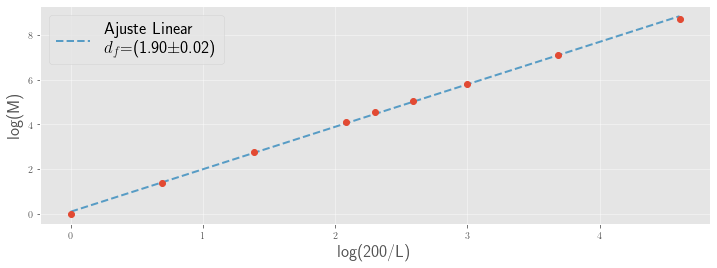

In [483]:
fig=plt.figure(figsize=(12,4))
x=np.log(200/Llist)
y=np.log(np.array(countlist))
plt.plot(x,y,'o',zorder=2)
popt0,pcov0=curve_fit(ax,x,y)
print(popt0[0])
[sa,sb]=np.sqrt(np.diag(pcov0))
print(sa)
plt.plot(x,ax(x,*popt0),linewidth=2,linestyle='dashed',alpha=.8,zorder=1,
         label='Ajuste Linear\n'+r'$d_f$=({:.2f}'.format(popt0[0])+r'$\pm${:.2f})'.format(sa))

#print((1.59-popt0[0])/sa)

plt.xlabel("log(200/L)",fontsize='xx-large')
plt.ylabel("log(M)",fontsize='xx-large')
plt.legend(fontsize='xx-large',loc='upper left')
fig.savefig('grafico3b2.png', bbox_inches='tight', dpi=100)
plt.show()

335
1210
6193


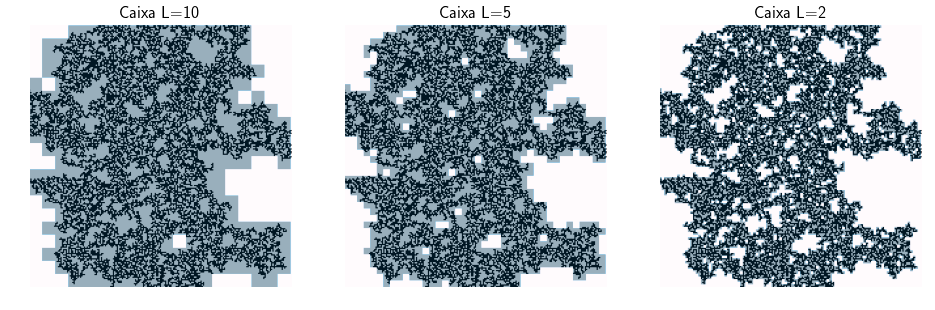

In [477]:
fig=plt.figure(figsize=(16,8))
sub=1
for L in Llist[-3:]:
    count=0
    mask=np.zeros(matrix.shape)
    for i in range(0,matrix.shape[0],L):
        for j in range(0,matrix.shape[1],L):
            if j+L>matrix.shape[1] or i+L>matrix.shape[0]:continue
            #print((i,i+L),(j,j+L), 1 in rede[i:i+L,j:j+L])
            if 1 in matrix[i:i+L,j:j+L]:
                count+=1
                mask[i:i+L,j:j+L]=1
    print(count)
    countlist.append(count)
    plt.subplot(1,3,sub)
    plt.title("Caixa L="+str(L),fontsize='xx-large')
    plt.imshow(matrix,cmap="Greys")
    plt.imshow(mask,cmap="PuBu",alpha=.4)
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.grid(False)
    #file='grafico2-'+str(L)+'.png'
    
    sub+=1
fig.savefig('grafico3b1.png', bbox_inches='tight', dpi=100)
plt.show()

### PROBABILIDADES

In [551]:
R=1000

Llist=[10,20,50,100,200]

freq=np.zeros((len(Llist),R))

l=0
for L in Llist:
    print(L)
    r=0
    while r !=R:
        matrix=np.zeros((L+1,L+1))
        matrix[L//2,L//2]=1

        perimeter=np.zeros(matrix.shape)
        perimeter=binary_dilation(matrix==1).astype(matrix.dtype)-matrix
        exclud=np.zeros(matrix.shape)
        while(np.count_nonzero(matrix+exclud)!=0):

            prob=np.random.random(np.count_nonzero(perimeter))

            for x,y,p in zip(np.where(perimeter==1)[0],np.where(perimeter==1)[1],prob):
                if p>0.5927:exclud[x,y]=1
                else:matrix[x,y]=1
            perimeter=binary_dilation(matrix==1).astype(matrix.dtype)-matrix-exclud
            if np.count_nonzero(perimeter)==0: break
        
        p=np.count_nonzero(matrix)/(L+1)**2
        if p>0.05:
            freq[l][r]=p
            r+=1
    l+=1

10
20
50
100
200


In [558]:
def gauss(x,x0,s,A):
    return A*np.exp(-(x-x0)**2/(2*s**2))/np.sqrt(np.pi*2*s**2)

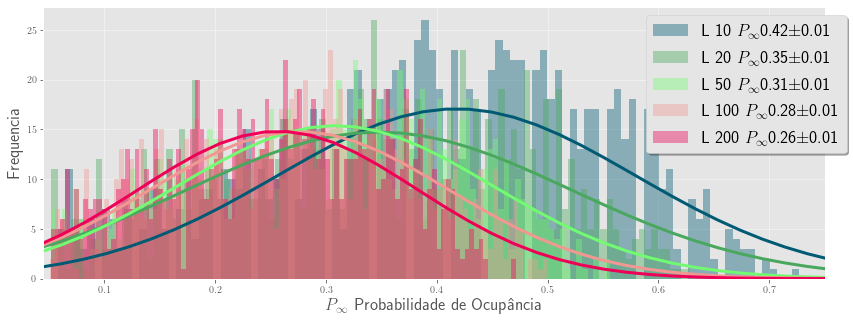

In [598]:
fig=plt.figure(figsize=(14,5))
m=[]
sm=[]
for i,c,l in zip(range(len(Llist)),['#005a74', '#49a85d', '#72fb72', '#f19893', '#ef0056'],Llist):
    y, xb = np.histogram(freq[i],bins=100)
    x = (xb[1:]+xb[:-1])/2
    popt,pcov=curve_fit(gauss,x,y)
    plt.hist(freq[i],bins=100,color=c,alpha=0.4,label='L '+str(l)+r' $P_\infty$'+r'{:.2f}$\pm${:.2f}'.format(popt[0],np.sqrt(np.diag(pcov))[0]))
    xi=np.linspace(0,1)
    plt.plot(xi,gauss(xi,*popt),color=c,linewidth=3)
    #print(popt[0])
    m.append(popt[0])
    sm.append(np.sqrt(np.diag(pcov))[0])
plt.legend(loc='upper center', bbox_to_anchor=(.9, 1),
          ncol=1, fancybox=True,shadow=True,fontsize='xx-large')
plt.xlim(0.045,0.75)
plt.ylabel('Frequencia',fontsize='xx-large')
plt.xlabel(r'$P_\infty$ Probabilidade de Ocupância',fontsize='xx-large')
fig.savefig('grafico3c.png', bbox_inches='tight', dpi=100)
plt.show()
    

In [604]:
def potx(x,a,y):
    return a*np.power(x,y)

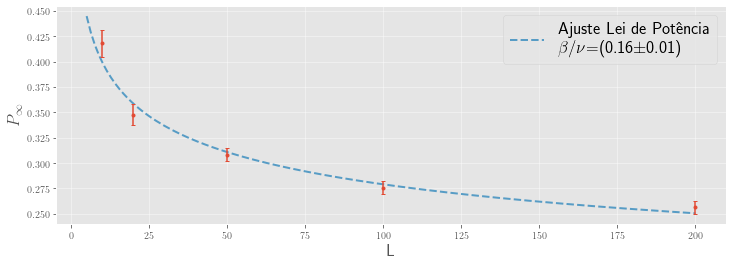

In [624]:
fig=plt.figure(figsize=(12,4))
plt.errorbar(Llist,m,yerr=sm,fmt='.',capsize=2,zorder=2)
popt0,pcov=curve_fit(potx,np.array(Llist),np.array(m),
                     sigma=np.array(sm), absolute_sigma=True)
b=abs(popt0[1])
sb=(np.sqrt(np.diag(pcov)))[1]
xi=np.linspace(5,200,150)
plt.plot(xi,potx(xi,*popt0),zorder=1,linewidth=2,linestyle='dashed',alpha=.8,
         label='Ajuste Lei de Potência\n'+r'$\beta/\nu$='+r'({:.2f}$\pm${:.2f})'.format(b,sb))
plt.xlabel('L',fontsize='xx-large')
plt.ylabel(r'$P_\infty$',fontsize='xx-large')
plt.legend(fontsize='xx-large')
fig.savefig('grafico3c2.png', bbox_inches='tight', dpi=100)
plt.show()

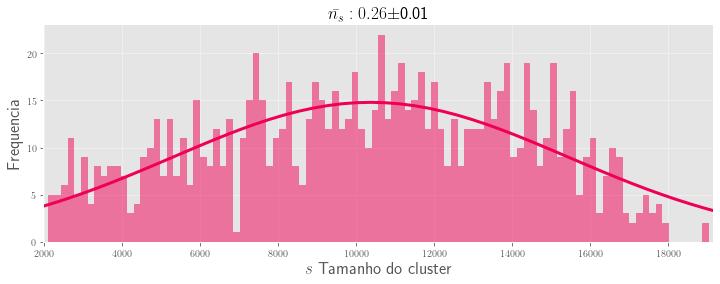

In [657]:
fig=plt.figure(figsize=(12,4))
plt.hist(freq[-1]*201**2,bins=100,color=c,alpha=.5)
y, xb = np.histogram(freq[-1]*201**2,bins=100)
x = (xb[1:]+xb[:-1])/2
popt,pcov=curve_fit(gauss,x,y,p0=[np.mean(x),np.std(x),np.sum(y)])
xi=np.linspace(x[0]-1e4,x[-1]+1e4,100)
plt.plot(xi,gauss(xi,*popt),color=c,linewidth=3)
plt.xlim(x[0]-200,x[-1]+200)
plt.ylabel('Frequencia',fontsize='xx-large')
plt.xlabel(r'$s$ Tamanho do cluster',fontsize='xx-large')
plt.title(r'$\bar{n_s}:$ '+r'${:.2f}\pm${:.2f}'.format(popt[0]/201**2,np.sqrt(np.diag(pcov))[0]/201**2),fontsize='xx-large')
fig.savefig('grafico3d.png', bbox_inches='tight', dpi=100)
plt.show()